## RF PatternTraces

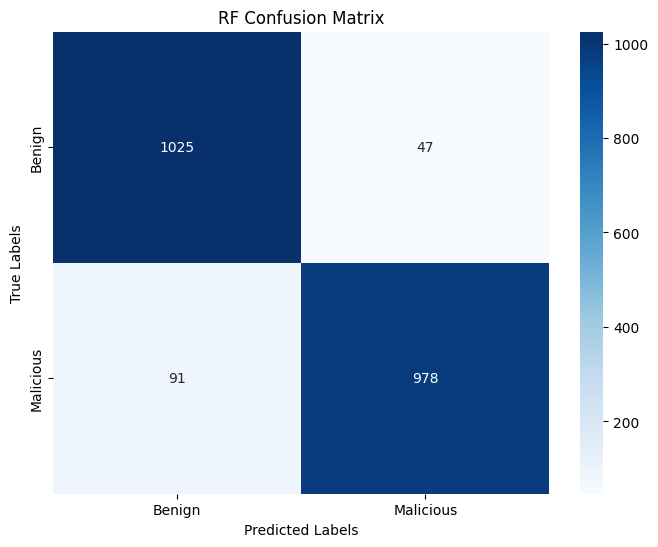

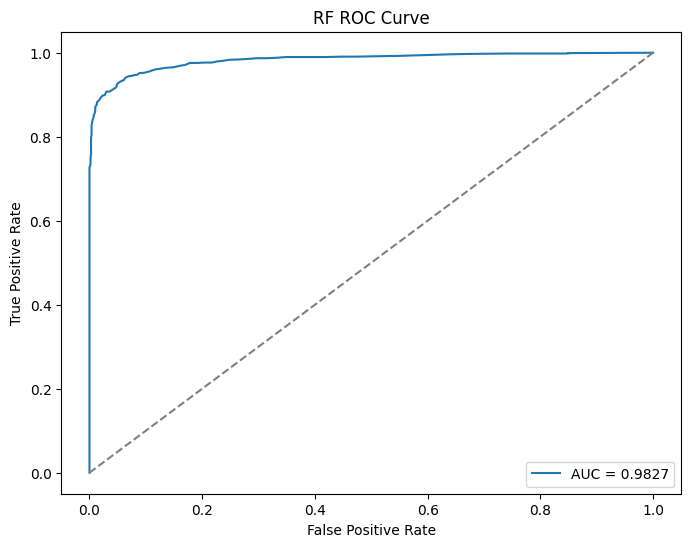

Train Accuracy: 0.99989989
Validation Accuracy: 0.93974778
Test Accuracy: 0.93554414
Precision: 0.93627756
Recall: 0.93554414
F1 Score: 0.93551505
ROC AUC: 0.98268145
Cohen's Kappa: 0.87108060
Training Time (s): 0.72136569
Validation Time (s): 0.05583811
Test Time (s): 0.06502557
Model saved at: RF_best_model.pkl


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns
all_pattern_columns = ['Total_Paths',
                       'Total_Error_Counts',
                       'Total_FD_Counts',
                       'Total_Python_Package_Count',
                       'Unique_Path_Count',
                       'Root',
                       'Temporary',
                       'Home',
                       'User',
                       'Sys',
                       'Etc',
                       'Other']

# Fill missing values
data[all_pattern_columns] = data[all_pattern_columns].fillna(0)

# Target variable
X = data[all_pattern_columns]
y = data['Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[all_pattern_columns])
X = pd.DataFrame(X_scaled, columns=all_pattern_columns)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model and record training time
start_train_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
rf_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
rf_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'RF_best_model.pkl'
joblib.dump(rf_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('RF Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('RF ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('RF ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## DT PatternTraces

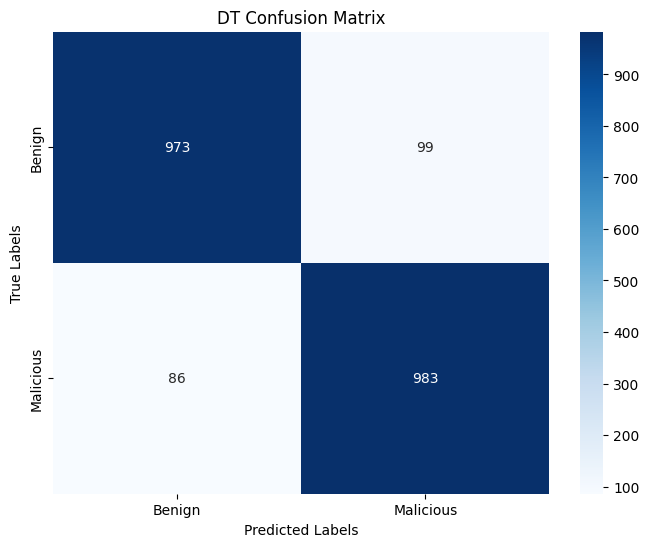

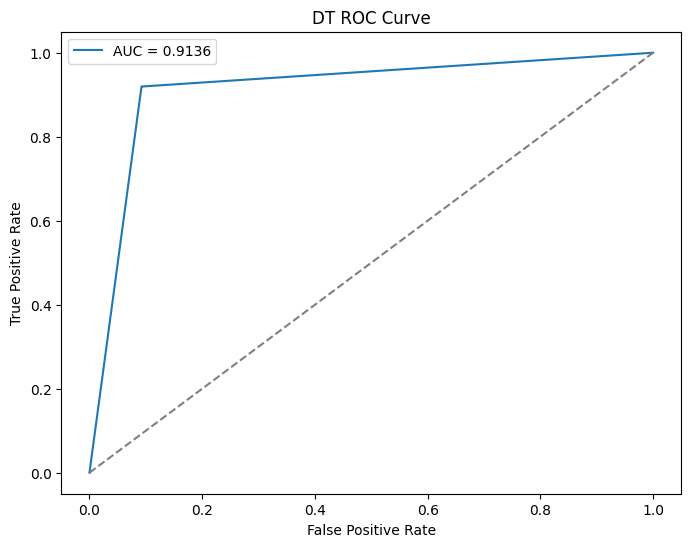

Train Accuracy: 0.99989989
Validation Accuracy: 0.90471742
Test Accuracy: 0.91359178
Precision: 0.91365425
Recall: 0.91359178
F1 Score: 0.91358933
ROC AUC: 0.91356260
Cohen's Kappa: 0.82718616
Training Time (s): 0.10698819
Validation Time (s): 0.00200057
Test Time (s): 0.00099397
Model saved at: DT_best_model_ngrams.pkl


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns
all_pattern_columns = ['Total_Paths',
                       'Total_Error_Counts',
                       'Total_FD_Counts',
                       'Total_Python_Package_Count',
                       'Unique_Path_Count',
                       'Root',
                       'Temporary',
                       'Home',
                       'User',
                       'Sys',
                       'Etc',
                       'Other']

# Fill missing values
data[all_pattern_columns] = data[all_pattern_columns].fillna(0)

# Target variable
X = data[all_pattern_columns]
y = data['Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[all_pattern_columns])
X = pd.DataFrame(X_scaled, columns=all_pattern_columns)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
dt_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = dt_model.predict(X_train)
y_val_pred = dt_model.predict(X_val)
y_test_pred = dt_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = dt_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
dt_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
dt_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'DT_best_model_ngrams.pkl'
joblib.dump(dt_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('DT Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('DT Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('DT ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('DT ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")

## SVM PatternTraces

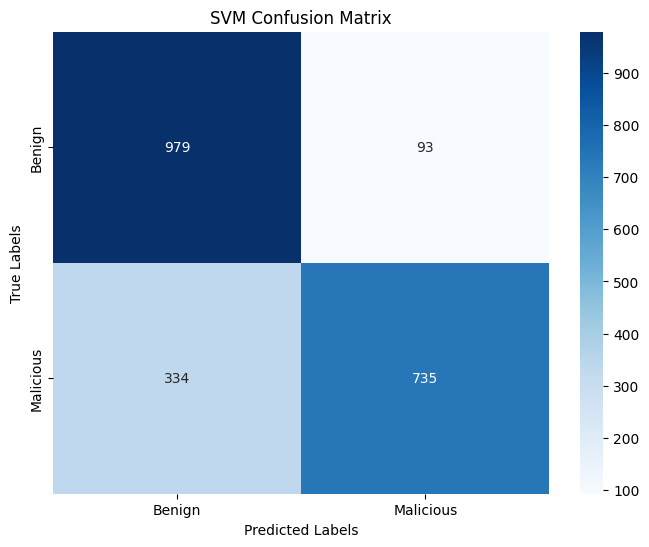

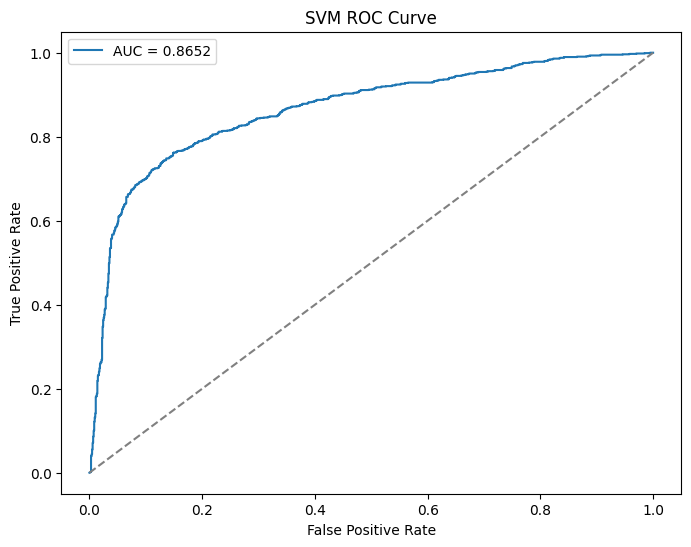

Train Accuracy: 0.78896786
Validation Accuracy: 0.79448856
Test Accuracy: 0.80056049
Precision: 0.81655141
Recall: 0.80056049
F1 Score: 0.79796832
ROC AUC: 0.86519650
Cohen's Kappa: 0.60099432
Training Time (s): 13.07610130
Validation Time (s): 0.16537905
Test Time (s): 0.14690042
Model saved at: SVM_best_model_ngrams.pkl


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns
all_pattern_columns = ['Total_Paths',
                       'Total_Error_Counts',
                       'Total_FD_Counts',
                       'Total_Python_Package_Count',
                       'Unique_Path_Count',
                       'Root',
                       'Temporary',
                       'Home',
                       'User',
                       'Sys',
                       'Etc',
                       'Other']

# Fill missing values
data[all_pattern_columns] = data[all_pattern_columns].fillna(0)

# Target variable
X = data[all_pattern_columns]
y = data['Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[all_pattern_columns])
X = pd.DataFrame(X_scaled, columns=all_pattern_columns)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize SVM model with probability=True for AUC/ROC calculations
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model and record training time
start_train_time = time.time()
svm_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = svm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
svm_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
svm_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'SVM_best_model_ngrams.pkl'
joblib.dump(svm_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('SVM Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('SVM ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## LR PatternTraces

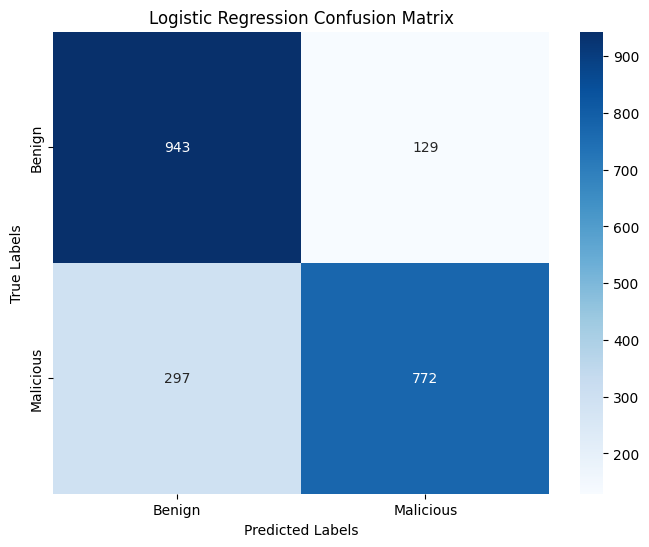

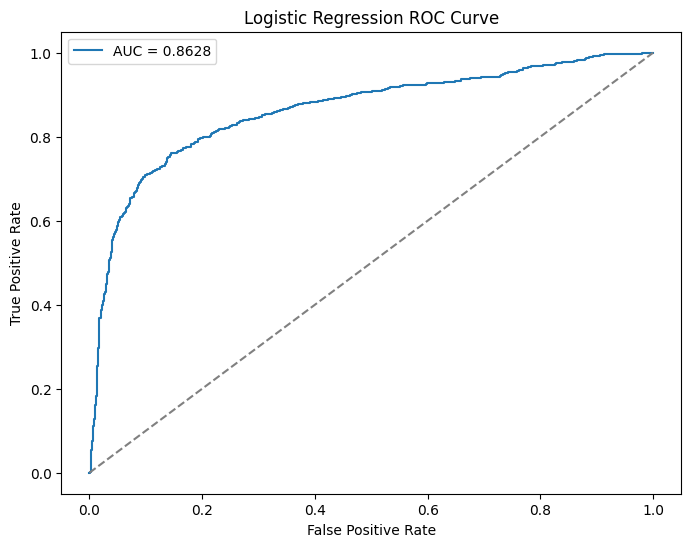

Train Accuracy: 0.78836720
Validation Accuracy: 0.78935077
Test Accuracy: 0.80102756
Precision: 0.80858731
Recall: 0.80102756
F1 Score: 0.79977256
ROC AUC: 0.86284434
Cohen's Kappa: 0.60196681
Training Time (s): 0.06570148
Validation Time (s): 0.00199842
Test Time (s): 0.00100422
Model saved at: LR_best_model_ngrams.pkl


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns
all_pattern_columns = ['Total_Paths',
                       'Total_Error_Counts',
                       'Total_FD_Counts',
                       'Total_Python_Package_Count',
                       'Unique_Path_Count',
                       'Root',
                       'Temporary',
                       'Home',
                       'User',
                       'Sys',
                       'Etc',
                       'Other']

# Fill missing values
data[all_pattern_columns] = data[all_pattern_columns].fillna(0)

# Target variable
X = data[all_pattern_columns]
y = data['Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[all_pattern_columns])
X = pd.DataFrame(X_scaled, columns=all_pattern_columns)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model and record training time
start_train_time = time.time()
lr_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)
y_test_pred = lr_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = lr_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
lr_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
lr_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'LR_best_model_ngrams.pkl'
joblib.dump(lr_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Logistic Regression Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Logistic Regression ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## KNN Pattern Traces

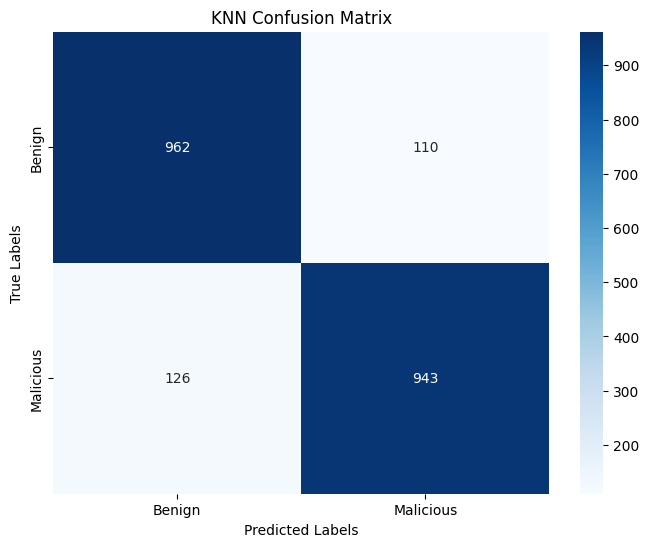

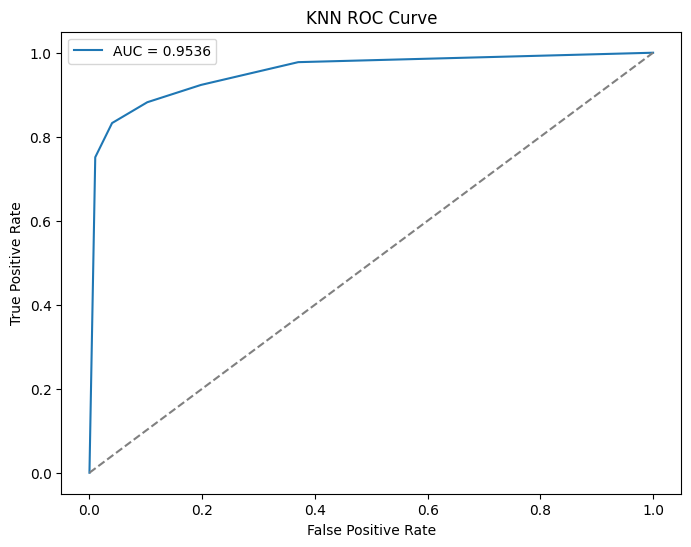

Train Accuracy: 0.91981179
Validation Accuracy: 0.87856142
Test Accuracy: 0.88977113
Precision: 0.88985592
Recall: 0.88977113
F1 Score: 0.88976382
ROC AUC: 0.95358247
Cohen's Kappa: 0.77953722
Training Time (s): 0.02113342
Validation Time (s): 0.14735699
Test Time (s): 0.13327909
Model saved at: KNN_best_model_ngrams.pkl


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns
all_pattern_columns = ['Total_Paths',
                       'Total_Error_Counts',
                       'Total_FD_Counts',
                       'Total_Python_Package_Count',
                       'Unique_Path_Count',
                       'Root',
                       'Temporary',
                       'Home',
                       'User',
                       'Sys',
                       'Etc',
                       'Other']

# Fill missing values
data[all_pattern_columns] = data[all_pattern_columns].fillna(0)

# Target variable
X = data[all_pattern_columns]
y = data['Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[all_pattern_columns])
X = pd.DataFrame(X_scaled, columns=all_pattern_columns)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model and record training time
start_train_time = time.time()
knn_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)
y_test_pred = knn_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = knn_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
knn_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
knn_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'KNN_best_model_ngrams.pkl'
joblib.dump(knn_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('KNN Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('KNN ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## GB Pattern Traces

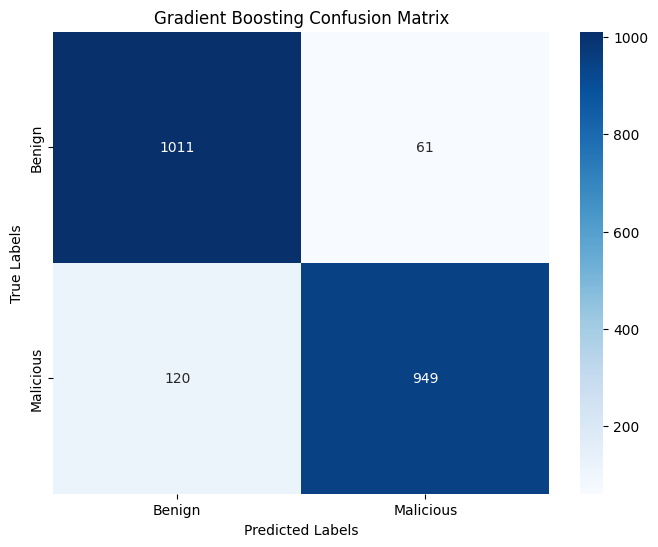

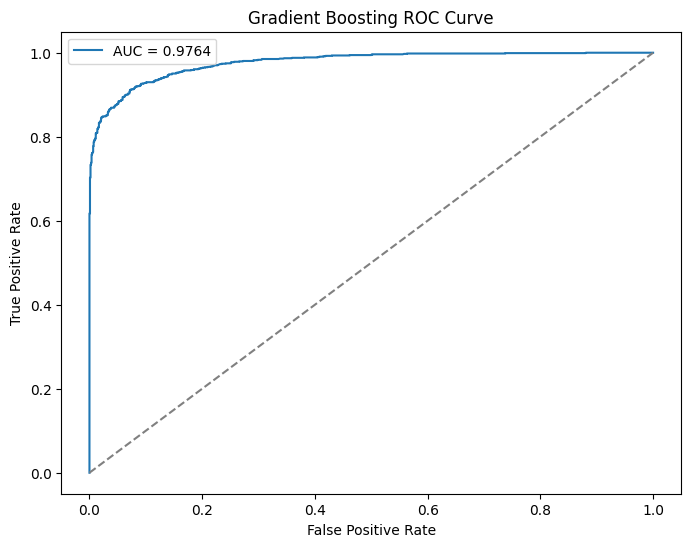

Train Accuracy: 0.92912203
Validation Accuracy: 0.91546007
Test Accuracy: 0.91546007
Precision: 0.91671956
Recall: 0.91546007
F1 Score: 0.91539254
ROC AUC: 0.97642604
Cohen's Kappa: 0.83090674
Training Time (s): 3.63531399
Validation Time (s): 0.00505519
Test Time (s): 0.00517011
Model saved at: GB_best_model_ngrams.pkl


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns
all_pattern_columns = ['Total_Paths',
                       'Total_Error_Counts',
                       'Total_FD_Counts',
                       'Total_Python_Package_Count',
                       'Unique_Path_Count',
                       'Root',
                       'Temporary',
                       'Home',
                       'User',
                       'Sys',
                       'Etc',
                       'Other']

# Fill missing values
data[all_pattern_columns] = data[all_pattern_columns].fillna(0)

# Target variable
X = data[all_pattern_columns]
y = data['Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[all_pattern_columns])
X = pd.DataFrame(X_scaled, columns=all_pattern_columns)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
gb_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)
y_test_pred = gb_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = gb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
gb_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
gb_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'GB_best_model_ngrams.pkl'
joblib.dump(gb_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Gradient Boosting Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Gradient Boosting ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Gradient Boosting ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


In [10]:
# Updated metrics for new data
updated_metrics = {
    "Model": ["Random Forest", "Decision Tree", "SVM", "Logistic Regression", "KNN", "Gradient Boosting"],
    "Train Accuracy": [0.99989989, 0.99989989, 0.78896786, 0.78836720, 0.91981179, 0.92912203],
    "Validation Accuracy": [0.93974778, 0.90471742, 0.79448856, 0.78935077, 0.87856142, 0.91546007],
    "Test Accuracy": [0.93554414, 0.91359178, 0.80056049, 0.80102756, 0.88977113, 0.91546007],
    "Precision": [0.93627756, 0.91365425, 0.81655141, 0.80858731, 0.88985592, 0.91671956],
    "Recall": [0.93554414, 0.91359178, 0.80056049, 0.80102756, 0.88977113, 0.91546007],
    "F1 Score": [0.93551505, 0.91358933, 0.79796832, 0.79977256, 0.88976382, 0.91539254],
    "ROC AUC": [0.98268145, 0.91356260, 0.86519650, 0.86284434, 0.95358247, 0.97642604],
    "Cohen's Kappa": [0.87108060, 0.82718616, 0.60099432, 0.60196681, 0.77953722, 0.83090674],
    "Training Time (s)": [0.72136569, 0.10698819, 13.07610130, 0.06570148, 0.02113342, 3.63531399],
    "Validation Time (s)": [0.05583811, 0.00200057, 0.16537905, 0.00199842, 0.14735699, 0.00505519],
    "Test Time (s)": [0.06502557, 0.00099397, 0.14690042, 0.00100422, 0.13327909, 0.00517011],
}

# Convert the dictionary to a DataFrame
updated_results_df = pd.DataFrame(updated_metrics)

# Save the DataFrame to a CSV file
updated_csv_file_path = "model_comparison_results.csv"
updated_results_df.to_csv(updated_csv_file_path, index=False)
updated_results_df

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC,Cohen's Kappa,Training Time (s),Validation Time (s),Test Time (s)
0,Random Forest,0.999900,0.939748,0.935544,0.936278,0.935544,0.935515,0.982681,0.871081,0.721366,0.055838,0.065026
1,Decision Tree,0.999900,0.904717,0.913592,0.913654,0.913592,0.913589,0.913563,0.827186,0.106988,0.002001,0.000994
2,SVM,0.788968,0.794489,0.800560,0.816551,0.800560,0.797968,0.865197,0.600994,13.076101,0.165379,0.146900
3,Logistic Regression,0.788367,0.789351,0.801028,0.808587,0.801028,0.799773,0.862844,0.601967,0.065701,0.001998,0.001004
4,KNN,0.919812,0.878561,0.889771,0.889856,0.889771,0.889764,0.953582,0.779537,0.021133,0.147357,0.133279
5,Gradient Boosting,0.929122,0.915460,0.915460,0.916720,0.915460,0.915393,0.976426,0.830907,3.635314,0.005055,0.005170


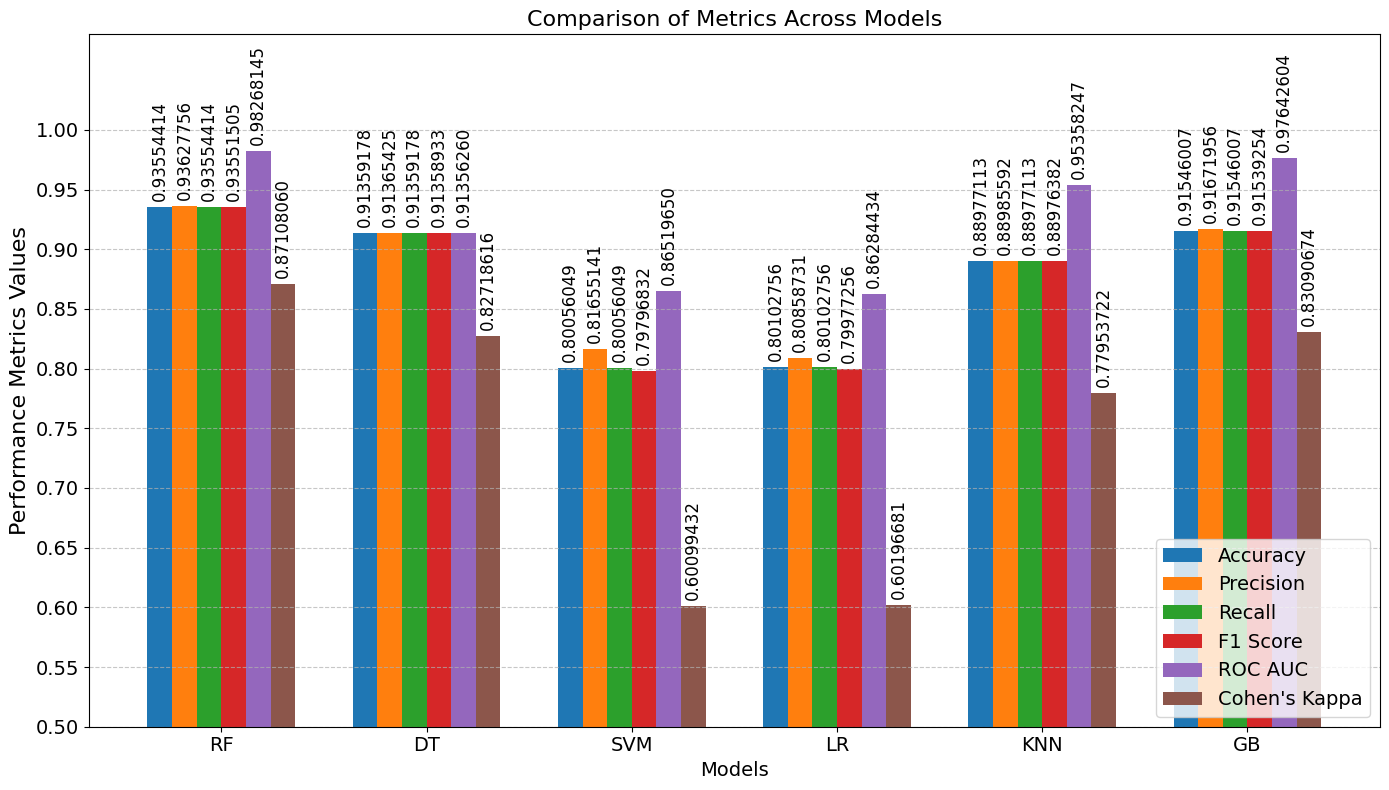

In [13]:
# Re-importing necessary libraries and re-defining the data
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = {
    "Accuracy": [0.93554414, 0.91359178, 0.80056049, 0.80102756, 0.88977113, 0.91546007],
    "Precision": [0.93627756, 0.91365425, 0.81655141, 0.80858731, 0.88985592, 0.91671956],
    "Recall": [0.93554414, 0.91359178, 0.80056049, 0.80102756, 0.88977113, 0.91546007],
    "F1 Score": [0.93551505, 0.91358933, 0.79796832, 0.79977256, 0.88976382, 0.91539254],
    "ROC AUC": [0.98268145, 0.91356260, 0.86519650, 0.86284434, 0.95358247, 0.97642604],
    "Cohen's Kappa": [0.87108060, 0.82718616, 0.60099432, 0.60196681, 0.77953722, 0.83090674],
}
models = ["RF", "DT", "SVM", "LR", "KNN", "GB"]

# Bar width and positions
bar_width = 0.12
x = np.arange(len(models))
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting bars for each metric
for i, (metric, values) in enumerate(metrics.items()):
    bars = ax.bar(x + i * bar_width, values, bar_width, label=metric)
    # Adding numerical values to each bar (vertically)
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{value:.8f}", 
                ha='center', va='bottom', rotation=90, fontsize=12)

# Customizing the plot
ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models, rotation=0, fontsize=14)
ax.set_title("Comparison of Metrics Across Models", fontsize=16)
ax.set_ylabel("Performance Metrics Values", fontsize=16)  # Increased Y-axis font size
ax.set_xlabel("Models", fontsize=14)
ax.legend(loc="lower right", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Setting the Y-axis to start from 0.5 with intervals of 0.05
ax.set_ylim(0.5, 1.08)
ax.set_yticks(np.arange(0.5, 1.05, 0.05))
ax.tick_params(axis='y', labelsize=14)  # Y-axis tick font size set to 14

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Comparison of Metrics Across Models.png')  # Save the plot
plt.show()